In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#System libraries
import os, time
from tqdm import tqdm
import pickle
import glob

# Data manipulation
import numpy as np
import pandas as pd
import collections, random, re
from collections import Counter

# Model building 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Read/Display  images
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

# import tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

In [ ]:
infile = open('/content/drive/MyDrive/DL/set_1.pkl', 'rb')
texts = pickle.load(infile)
infile.close()

In [ ]:
print(texts)

['2089122314_40d5739aef.jpg#3\tA fluffy , tri-colored dog be run down a road with a paper in its mouth .', '1295671216_cde1b9c9d1.jpg#0\tA crowd of person be stand together on a sidewalk , while one man be take a picture .', '3183195185_cd0ff994a1.jpg#4\tThe man and boy sit on the ground , next to a rocky wall .', '2949353587_64c54e9589.jpg#1\tA brown dog be play with a white fluffy stuff animal .', '361092202_3d70144ebd.jpg#2\tA man hike with a large backpack and two pole near a collection of pointy white rock .', '544301311_5e7d69a517.jpg#1\tTwo girl sit by a doorway on the step .', '3477778668_81ff0a68e0.jpg#1\tA wed photo , the bridesmaid in purple , all of the groomsman jump .', '2561481438_447b852e4d.jpg#3\tA dog play in water .', '1683444418_815f660379.jpg#2\tTwo man be pose for a photograph in front of a fountain in a city .', '241109594_3cb90fe2a3.jpg#2\ta dog swim in the water with a stick in its mouth', '1691573772_1adef8e40e.jpg#0\tA girl in a pink shirt be ride a bicycle i

In [ ]:
print(type(texts))

<class 'list'>


In [ ]:
import pandas

In [ ]:
image_id_list, caption_id_list, caption_list = [], [], []
for text in texts:
  image_caption_id, caption = text.split('\t')
  image_id, caption_id = image_caption_id.split('#')
  image_id_list.append(image_id)
  caption_id_list.append(caption_id)
  caption_list.append(caption)
image_caption_dataset = pandas.DataFrame({'image_id':image_id_list, 'caption_id':caption_id_list, 'caption':caption_list})

In [ ]:
image_caption_dataset.head()

,image_id,caption_id,caption
0,2089122314_40d5739aef.jpg,3,"A fluffy , tri-colored dog be run down a road ..."
1,1295671216_cde1b9c9d1.jpg,0,A crowd of person be stand together on a sidew...
2,3183195185_cd0ff994a1.jpg,4,"The man and boy sit on the ground , next to a ..."
3,2949353587_64c54e9589.jpg,1,A brown dog be play with a white fluffy stuff ...
4,361092202_3d70144ebd.jpg,2,A man hike with a large backpack and two pole ...


In [ ]:
image_caption_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    25000 non-null  object
 1   caption_id  25000 non-null  object
 2   caption     25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


In [ ]:
import glob
image_id= []

images='/content/drive/MyDrive/DL/Flicker8k_Dataset'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))
for img in all_imgs:
  image_id.append(img.split('Dataset/')[1])
image_id_path_df = pandas.DataFrame({'image_id':image_id, 'image_path':all_imgs})
image_id_path_df.head()

The total images present in the dataset: 8101


,image_id,image_path
0,3645080830_1d9ee2f50a.jpg,/content/drive/MyDrive/DL/Flicker8k_Dataset/36...
1,2505360288_c972bd29c4.jpg,/content/drive/MyDrive/DL/Flicker8k_Dataset/25...
2,489773343_a8aecf7db3.jpg,/content/drive/MyDrive/DL/Flicker8k_Dataset/48...
3,466956675_a2fb6bf901.jpg,/content/drive/MyDrive/DL/Flicker8k_Dataset/46...
4,106490881_5a2dd9b7bd.jpg,/content/drive/MyDrive/DL/Flicker8k_Dataset/10...


In [ ]:
image_id_path_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    8101 non-null   object
 1   image_path  8101 non-null   object
dtypes: object(2)
memory usage: 126.7+ KB


In [ ]:
df = pandas.merge(image_caption_dataset, image_id_path_df, how='inner', on = 'image_id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24996 entries, 0 to 24995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    24996 non-null  object
 1   caption_id  24996 non-null  object
 2   caption     24996 non-null  object
 3   image_path  24996 non-null  object
dtypes: object(4)
memory usage: 976.4+ KB


In [ ]:
df.head()

,image_id,caption_id,caption,image_path
0,2089122314_40d5739aef.jpg,3,"A fluffy , tri-colored dog be run down a road ...",/content/drive/MyDrive/DL/Flicker8k_Dataset/20...
1,2089122314_40d5739aef.jpg,0,A dog run with a newspaper in its mouth .,/content/drive/MyDrive/DL/Flicker8k_Dataset/20...
2,2089122314_40d5739aef.jpg,2,A dog with a newspaper in his mouth run down a...,/content/drive/MyDrive/DL/Flicker8k_Dataset/20...
3,1295671216_cde1b9c9d1.jpg,0,A crowd of person be stand together on a sidew...,/content/drive/MyDrive/DL/Flicker8k_Dataset/12...
4,1295671216_cde1b9c9d1.jpg,4,A person in jean and a blue sweatshirt aim a c...,/content/drive/MyDrive/DL/Flicker8k_Dataset/12...


In [ ]:
annotations=df.caption.apply(lambda z:"<start>"+" "+z+" "+"<end>")

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# create the tokenizer
## oov_token - out of vacabulary
top_word_cnt = 5000
special_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_word_cnt, oov_token="<unk>", filters=special_chars, lower=True)
tokenizer.fit_on_texts(annotations)
train_seqs = tokenizer.texts_to_sequences(annotations)

In [ ]:
train_seqs[:10]

[[3, 2, 593, 1319, 277, 9, 6, 21, 42, 2, 152, 12, 2, 408, 5, 74, 66, 4],
 [3, 2, 9, 21, 12, 2, 700, 5, 74, 66, 4],
 [3, 2, 9, 12, 2, 700, 5, 34, 66, 21, 42, 2, 684, 180, 4],
 [3, 2, 111, 13, 19, 6, 25, 144, 8, 2, 160, 40, 58, 11, 6, 132, 2, 127, 4],
 [3, 2, 19, 5, 219, 10, 2, 36, 487, 943, 2, 91, 40, 25, 67, 2, 111, 13, 19, 4],
 [3, 2, 191, 5, 2, 36, 487, 132, 2, 127, 4],
 [3, 7, 11, 10, 16, 35, 8, 7, 153, 82, 24, 2, 206, 112, 4],
 [3, 2, 11, 10, 2, 52, 16, 35, 10, 419, 262, 2, 333, 112, 4],
 [3, 2, 32, 9, 6, 22, 12, 2, 18, 593, 780, 327, 4],
 [3, 2, 212, 32, 9, 488, 8, 162, 18, 10, 593, 4]]

In [ ]:
annotations[:10]

0    <start> A fluffy , tri-colored dog be run down...
1    <start> A dog run with a newspaper in its mout...
2    <start> A dog with a newspaper in his mouth ru...
3    <start> A crowd of person be stand together on...
4    <start> A person in jean and a blue sweatshirt...
5    <start> A guy in a blue sweatshirt take a pict...
6    <start> The man and boy sit on the ground , ne...
7    <start> A man and a small boy sit and rest aga...
8    <start> A brown dog be play with a white fluff...
9    <start> A dark brown dog chew on something whi...
Name: caption, dtype: object

In [ ]:
# Create word-to-index and index-to-word mappings.
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
train_seqs = tokenizer.texts_to_sequences(annotations)

In [ ]:
max_len = max([len(cap) for cap in train_seqs])
print("shape of caption vector: ", len(train_seqs))
print("Maximum length of sequence: ",max_len)

shape of caption vector:  24996
Maximum length of sequence:  39


In [ ]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
## Padding - Pad before("pre") or after("post") each sequence.
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs,
                                                          padding='post',
                                                          maxlen=max_len)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(24996, 39)


In [ ]:
cap_vector

array([[  3,   2, 593, ...,   0,   0,   0],
       [  3,   2,   9, ...,   0,   0,   0],
       [  3,   2,   9, ...,   0,   0,   0],
       ...,
       [  3,   2, 145, ...,   0,   0,   0],
       [  3, 298,   6, ...,   0,   0,   0],
       [  3,   2,  31, ...,   0,   0,   0]], dtype=int32)

In [ ]:
#df.drop('caption_id', inplace=True, axis =1)

In [ ]:
#df = df.groupby('image_id').agg(lambda x: list(set(x.tolist())))

In [ ]:
#df['image_path'] = df['image_path'].apply(lambda x: x[0])

In [ ]:
#df['image_id'] = df.index

In [ ]:
#import numpy as np

In [ ]:
#df.index = np.arange(1, len(df) + 1)

In [ ]:
df.head()

,image_id,caption_id,caption,image_path
0,2089122314_40d5739aef.jpg,3,"A fluffy , tri-colored dog be run down a road ...",/content/drive/MyDrive/DL/Flicker8k_Dataset/20...
1,2089122314_40d5739aef.jpg,0,A dog run with a newspaper in its mouth .,/content/drive/MyDrive/DL/Flicker8k_Dataset/20...
2,2089122314_40d5739aef.jpg,2,A dog with a newspaper in his mouth run down a...,/content/drive/MyDrive/DL/Flicker8k_Dataset/20...
3,1295671216_cde1b9c9d1.jpg,0,A crowd of person be stand together on a sidew...,/content/drive/MyDrive/DL/Flicker8k_Dataset/12...
4,1295671216_cde1b9c9d1.jpg,4,A person in jean and a blue sweatshirt aim a c...,/content/drive/MyDrive/DL/Flicker8k_Dataset/12...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24996 entries, 0 to 24995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    24996 non-null  object
 1   caption_id  24996 non-null  object
 2   caption     24996 non-null  object
 3   image_path  24996 non-null  object
dtypes: object(4)
memory usage: 976.4+ KB


In [ ]:
import random
from PIL import Image

In [ ]:
'''image_id_list = df['image_id'].tolist()
def plot_image_caption():
  image = random.choice(image_id_list)
  for index, row in df.iterrows():
    if image == row['image_id']:
      return row['caption'], row['image_path']
      '''

"image_id_list = df['image_id'].tolist()\ndef plot_image_caption():\n  image = random.choice(image_id_list)\n  for index, row in df.iterrows():\n    if image == row['image_id']:\n      return row['caption'], row['image_path']\n      "

In [ ]:
image_id_list = df['image_id'].tolist()
def plot_image_caption():
  captions = []
  image = random.choice(image_id_list)
  for index, row in df.iterrows():
    if image == row['image_id']:
      captions.append(row['caption'])
      image_path = row['image_path']
  return captions, image_path

In [ ]:
image1_captions, image1_path = plot_image_caption()
for image1_caption in image1_captions:
  print(image1_caption)

A young child with snow on his face get out of a blue sled .
A child in orange pose in the snow ride a blue sled .
A little boy in an orange goggles and coat be play on a blue sled in the snow .
A child on a plastic sled .


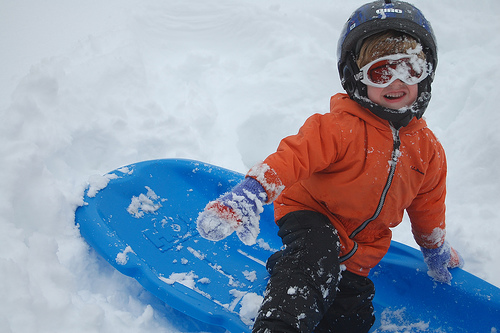

In [ ]:
Image.open(image1_path)

In [ ]:
image2_captions, image2_path = plot_image_caption()
for image2_caption in image2_captions:
  print(image2_caption)

A dog play in the grass .
A black dog be happy run through the grass .
a black dog run with its tongue out .


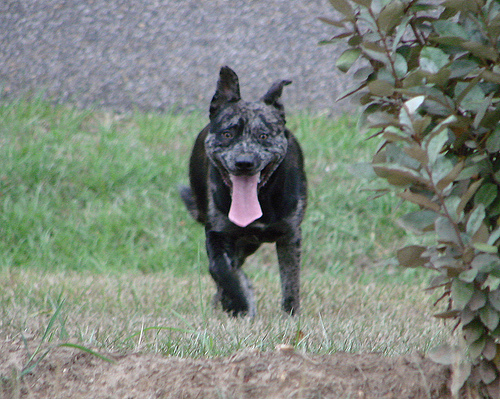

In [ ]:
Image.open(image2_path)

## **Pre-processing images**

In [ ]:
#! pip install Pillow==4.2.1

In [ ]:
import numpy as np
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
model = ResNet50(include_top=True, weights="imagenet", input_tensor=None, input_shape=None, pooling=None, classes=1000)
# extract features from each photo
features = dict()
for index, row in df.iterrows():
  filename = row['image_path']
  image = Image.open(filename)
  image = image.resize((224,224))          
  image = np.expand_dims(image, axis=0)         
  image = image/127.5
  image = image - 1.0          
  feature = model.predict(image)
  features[row['image_id']] = feature

102981632/102967424 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train-test split
image_train, image_test, caption_train, caption_test = train_test_split(image_id_list,cap_vector, test_size=0.2,random_state=42)

In [ ]:
print("Training data for images: " + str(len(image_train)))
print("Testing data for images: " + str(len(image_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 19996
Testing data for images: 5000
Training data for Captions: 19996
Testing data for Captions: 5000


In [ ]:
image_model = ResNet50(include_top=False,weights='imagenet')

#image_model = ResNet50(include_top=False,weights='imagenet')

new_input = image_model.input  # get the input of the image_model
hidden_layer = image_model.layers[-1].output  # get the output of the image_model

image_features_extract_model = keras.Model(new_input, hidden_layer)  # build the final model using both input & output layer

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
image_model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
def generate_dataset(images_data, captions_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_function, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
train_dataset=generate_dataset(image_train,caption_train)
test_dataset=generate_dataset(image_test,caption_test)

NameError: ignored

In [ ]:
BATCH_SIZE = 32
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(image_train) // BATCH_SIZE
test_num_steps = len(image_test) // BATCH_SIZE

In [ ]:
from tensorflow.keras import layers, Model
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim)
        self.dropout = tf.keras.layers.Dropout(0.5) ## Taking dropouts as 0.5
        
    def call(self, features):
        # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  self.dense(features) 
        features = tf.nn.relu(features)
        
        return features

In [ ]:
encoder=Encoder(embedding_dim)

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis = 1) # reduce the shape to (batch_size, embedding_dim)
        return context_vector, attention_weights

In [ ]:
class RNN_Decoder(Model):
    def __init__(self, embedding_dim, units, vocab_size):

        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.gru = layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        
        self.fc1 = layers.Dense(self.units)
        self.fc2 = layers.Dense(vocab_size)

        self.attention = Attention_model(self.units)

    def call(self, x, features, hidden):
    # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

    # #x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
        output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights

    def init_state(self, batch_size):
      return tf.zeros((batch_size, self.units))

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim, mask_zero =  False) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        self.dropout = tf.keras.layers.Dropout(0.5)
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed =  self.dropout(self.embed(x)) # embed your input to shape: (batch_size, 1, embedding_dim)
        mask = self.embed.compute_mask(x)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed, mask = mask) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
'''features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)
'''

NameError: ignored

In [ ]:
optimizer = tf.keras.optimizers.RMSprop() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none') #define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./CHECKPOINTS/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        avg_loss = (loss/int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0
    
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    
    return avg_test_loss

In [ ]:
import time
test_loss_plot = []
EPOCHS = 50

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/50 [00:00<?, ?it/s]


NameError: ignored